# imports

In [53]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import os
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time
%matplotlib inline

import our libaries

In [62]:
import preprocess as pp
import vectorizer as vr
import cluster as clst
import analyze as anlz

# Setup

In [55]:
t = time.localtime()
timestamp = time.strftime('%b_%d_%Y_%H%M', t)
np.random.seed(4)
if not os.path.exists('results'):
    os.mkdir('results')
if not os.path.exists('results/' + timestamp):
    os.mkdir('results/' + timestamp)
with open('results/' + timestamp +'/log.txt','w') as ff:
    with open('main.ipynb', 'r') as fp:
        ff.write(fp.read())

parmeters

In [56]:
min_df = 1e-4#1e-10
max_df = 0.05#1
k = 200
max_num = 1000#len(emails)

In [57]:
newsgroups_train = fetch_20newsgroups(subset='train')
labels = newsgroups_train.target
labels_names = newsgroups_train.target_names
#TODO: consider take only body
emails = newsgroups_train.data
emails = emails[:max_num]

# preprocess

In [58]:
emails = [pp.clean_text(e) for e in emails]

# vectorizing

Bag Of Words

In [17]:
cv,tokenized_emails = vr.tokenizer(emails,min_df,max_df)
#{k: v for k, v in zip(cv.get_feature_names(), sample_vec.toarray()[0]) if v > 0}
# to get vocabulary names use: cv.get_feature_names()
voc_names = cv.get_feature_names()
#to get BOW for each mail use: tokenized_emails.toarray()
emails_representation = tokenized_emails.toarray()

NameError: name 'sample_vec' is not defined

TF-IDF

In [59]:
tf_idf = vr.tf_idf(emails,min_df,max_df)
emails_representation = tf_idf.toarray()

Word2Vec

In [ ]:
emails_representation = vr.BOW_w2v(emails)

# clustering

k-means with cosine distancce

In [ ]:
print('compute kmeans clusters. vector shape:{}'.format(emails_representation.shape[1]))
clusters,kmns_class = clst.kmeans_cosine_dist(emails_representation,k)

k-means with euclidean distance

In [ ]:
clusters,kmns_class = clst.kmeans(emails_representation,k)

Hierchical clustring

In [60]:
(clusters, _) = clst.hirarchical(emails_representation, k,aff='euclidean',link='ward')

# analayze

In [68]:

def evaluate_many2one_conf_mat(mat, num_of_labels):
    mat = mat[:num_of_labels, :]
    labes_conf_mat = np.zeros((num_of_labels,num_of_labels))
    for col in mat.T:
        predicted_label = np.argmax(col)
        labes_conf_mat[:,predicted_label] += col

    return labes_conf_mat

def conf_mat2scores(cm):
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = []
    for i in range(cm.shape[0]):
        temp = np.delete(cm, i, 0)  # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    accuracy = np.sum(TP)/np.sum(cm)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return accuracy,precision,recall

In [78]:
number_of_labels = 20
random_clst = np.random.randint(0, k, max_num)
conf_mat_rand = confusion_matrix(labels[:max_num], random_clst)
conf_mat = confusion_matrix(labels[:max_num], clusters)

ret_rand = anlz.evaluate_many2one(conf_mat_rand,number_of_labels)
ret = anlz.evaluate_many2one(conf_mat, number_of_labels)
print('acc: {} (random={})'.format(np.mean(ret),np.mean(ret_rand)))

labels_conf_mat = evaluate_many2one_conf_mat(conf_mat,number_of_labels)
labels_conf_mat_rand = evaluate_many2one_conf_mat(conf_mat_rand,number_of_labels)
acc, precision,recall = conf_mat2scores(labels_conf_mat)
print('accuracy: ', acc)
acc_rand, precision_rand,recall_rand = conf_mat2scores(labels_conf_mat_rand)
print('accuracy random labeling: ', acc_rand)

acc: 0.6100761925743103 (random=0.27801000393028824)
accuracy:  0.617
accuracy random labeling:  0.287


In [ ]:
with open('results/' + timestamp + '/kmeans.pkl','wb') as wf:
    pickle.dump(conf_mat,wf)

### visualization

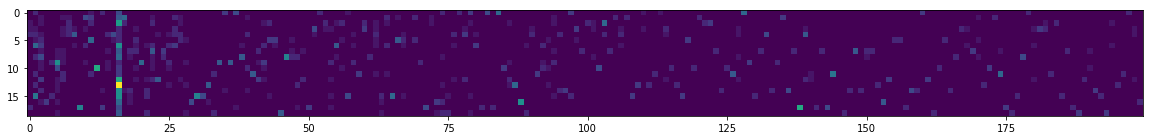

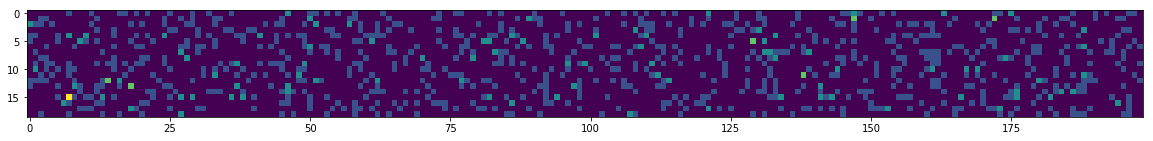

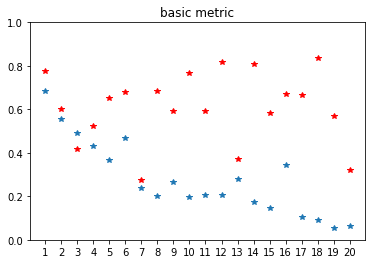

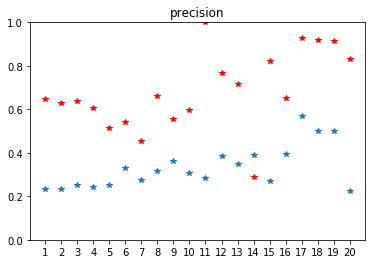

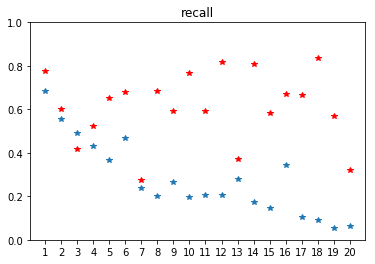

In [80]:
plt.figure(1, figsize=(20,20))
plt.imshow(conf_mat[0:number_of_labels-1,:])
#plt.colorbar()
plt.savefig('results/' + timestamp + '/conf_mat.png')

plt.figure(2,figsize=(20,20))
plt.imshow(conf_mat_rand[0:number_of_labels-1,:])
#plt.colorbar()

plt.savefig('results/' + timestamp + '/conf_mat_rand.png')

plt.figure(3)
plt.plot(range(1, 1 + number_of_labels), ret_rand, '*')
plt.plot(range(1, 1 + number_of_labels), ret, '*r')
plt.xticks(range(1,21))
plt.ylim([0, 1])
plt.title('basic metric')
plt.savefig('results/' + timestamp + '/acc.png')

plt.figure(4)
plt.plot(range(1, 1 + number_of_labels), precision, '*r')
plt.plot(range(1, 1 + number_of_labels), precision_rand, '*')
plt.xticks(range(1,21))
plt.ylim([0, 1])
plt.title('precision')
plt.savefig('results/' + timestamp + '/precision.png')

plt.figure(5)
plt.plot(range(1, 1 + number_of_labels), recall, '*r')
plt.plot(range(1, 1 + number_of_labels), recall_rand, '*')
plt.xticks(range(1,21))
plt.ylim([0, 1])
plt.title('recall')
plt.savefig('results/' + timestamp + '/recall.png')

### labels histogram

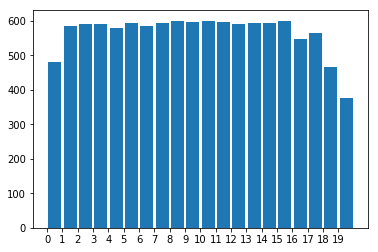

In [40]:
plt.figure(4)
plt.hist(labels,rwidth=0.85,bins = range(21) )
plt.xticks(range(20))
plt.show()

In [47]:
np.zeros(5)

array([0., 0., 0., 0., 0.])